# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import opm_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_path = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
city_count

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

query_url = f"{url}appid={opm_key}&units={units}&q="


In [4]:
city_list=[]
cnty=[]
date=[]
humid=[]
clouds=[]
lat=[]
lon=[]
temp=[]
wind=[]

progress = 0
skipped = 0

for i in cities:
    try:
        city_data = requests.get(query_url + i).json()
        
        city_list.append(city_data["name"])
        cnty.append(city_data["sys"]["country"])
        date.append(city_data["dt"])
        humid.append(city_data["main"]["humidity"])
        clouds.append(city_data["clouds"]["all"])
        lat.append(city_data["coord"]["lat"])
        lon.append(city_data["coord"]["lon"])
        temp.append(city_data["main"]["temp_max"])
        wind.append(city_data["wind"]["speed"])
        
        progress += 1
        print(f"{progress} of {city_count} processed: {i}")
        
    except:
        print("no data - skipped")
        skipped += 1


print(f"{skipped} cities skipped.")

1 of 619 processed: butaritari
no data - skipped
2 of 619 processed: cherskiy
3 of 619 processed: rikitea
4 of 619 processed: mataura
5 of 619 processed: port blair
no data - skipped
6 of 619 processed: udimskiy
7 of 619 processed: dikson
8 of 619 processed: katsuura
9 of 619 processed: busselton
10 of 619 processed: riviere-au-renard
11 of 619 processed: saint-philippe
12 of 619 processed: naliya
13 of 619 processed: kashmor
no data - skipped
14 of 619 processed: albany
15 of 619 processed: elizabeth city
16 of 619 processed: vaini
17 of 619 processed: labytnangi
18 of 619 processed: mirnyy
19 of 619 processed: longyearbyen
20 of 619 processed: georgetown
21 of 619 processed: boyolangu
22 of 619 processed: hazaribag
23 of 619 processed: punta arenas
24 of 619 processed: phan thiet
25 of 619 processed: saskylakh
26 of 619 processed: jamestown
27 of 619 processed: hermanus
28 of 619 processed: esperance
29 of 619 processed: amarante do maranhao
30 of 619 processed: avarua
31 of 619 proc

248 of 619 processed: souillac
249 of 619 processed: camaqua
250 of 619 processed: camacha
251 of 619 processed: sao jose dos pinhais
252 of 619 processed: phalaborwa
253 of 619 processed: hakkari
254 of 619 processed: doha
no data - skipped
255 of 619 processed: srivardhan
256 of 619 processed: poum
257 of 619 processed: bontang
258 of 619 processed: mizdah
259 of 619 processed: espanola
260 of 619 processed: marawi
261 of 619 processed: arman
262 of 619 processed: kushiro
263 of 619 processed: chapais
264 of 619 processed: san vicente
265 of 619 processed: nyurba
266 of 619 processed: port hardy
267 of 619 processed: pahrump
268 of 619 processed: lata
269 of 619 processed: saldanha
270 of 619 processed: pangnirtung
271 of 619 processed: benguela
no data - skipped
272 of 619 processed: nuevo progreso
no data - skipped
273 of 619 processed: cockburn town
274 of 619 processed: general roca
no data - skipped
275 of 619 processed: leningradskiy
276 of 619 processed: birakan
277 of 619 pro

491 of 619 processed: sao joao do piaui
492 of 619 processed: gobabis
493 of 619 processed: kilindoni
494 of 619 processed: tilichiki
495 of 619 processed: vilyuysk
496 of 619 processed: shingu
497 of 619 processed: sao joao da barra
498 of 619 processed: port keats
499 of 619 processed: rocha
no data - skipped
500 of 619 processed: chipiona
501 of 619 processed: murgab
502 of 619 processed: priladozhskiy
503 of 619 processed: vawkavysk
504 of 619 processed: arequipa
505 of 619 processed: el alto
506 of 619 processed: tandil
507 of 619 processed: bilma
508 of 619 processed: la ronge
509 of 619 processed: rabo de peixe
510 of 619 processed: ballina
511 of 619 processed: baruun-urt
512 of 619 processed: iwanai
513 of 619 processed: hobyo
514 of 619 processed: santander
515 of 619 processed: yar-sale
516 of 619 processed: rincon
517 of 619 processed: inhambane
518 of 619 processed: westport
no data - skipped
519 of 619 processed: meridian
520 of 619 processed: darhan
521 of 619 processed:

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_csv = pd.DataFrame({"City":city_list,
                         "Country":cnty,
                         "Date":date,
                         "Humidity %":humid,
                         "Cloudiness":clouds,
                         "Lattitude":lat,
                         "Longitude":lon,
                         "Max Temperature":temp,                        
                         "Wind Speed (MPH)":wind
                        })

city_csv.head()

city_csv.to_csv(output_path, index=True)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
def plotsplat(x,y):
    plt.scatter(x=x, y=y, edgecolor = "black")
    xn = x.name
    yn = y.name
    plt.ylabel(yn)
    plt.xlabel(xn)
    plt.grid(True)
    cur_date = pd.datetime.today().strftime("%m/%d/%Y")
    plt.title(f"City {xn} vs {yn} - ({cur_date})" )
    plt.tight_layout
    

#### Latitude vs. Temperature Plot

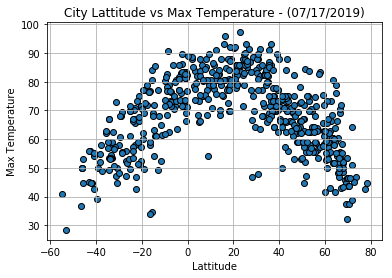

In [7]:
plotsplat(city_csv["Lattitude"],city_csv["Max Temperature"])
plt.savefig("output_data/max_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

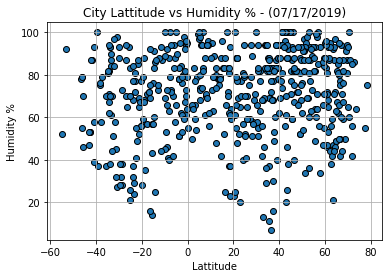

In [8]:
plotsplat(city_csv["Lattitude"],city_csv["Humidity %"])
plt.savefig("output_data/humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

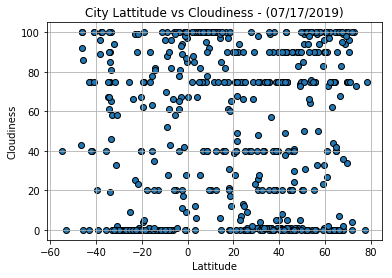

In [9]:
plotsplat(city_csv["Lattitude"],city_csv["Cloudiness"])
plt.savefig("output_data/cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

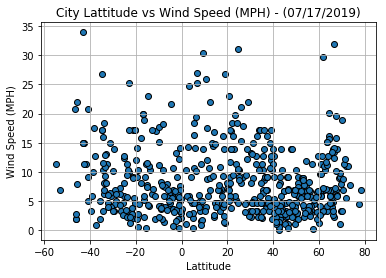

In [10]:
plotsplat(city_csv["Lattitude"],city_csv["Wind Speed (MPH)"])
plt.savefig("output_data/wind_speed.png")
plt.show()